<a href="https://colab.research.google.com/github/bdrinconp/ml_actuaria/blob/main/IDA/Chain_Ladder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Chain-Ladder
Repo: https://github.com/bdrinconp/ml_actuaria

**Primas incurridas (IncurLoss_R1)**

Las perdidas incurridas representan el total estimado de costos que una compañia de seguros espera tener que pagar debido a siniestros que han ocurrido durante un período de tiempo especifico. Esto incluye tanto los pagos que yan se han hecho como las estimaciones de los pagos futuros relacionados con esos siniestros. También puede incluir gastos asignados como costos legales.

**Pérdidas pagadas acumuladas (CumPaidLoss_R1)**
Las pérdidas pagadas acumuladas son aquellas que efectivamente se han pagado durante un periodo de tiempo especifico. Estos son desembolsos reales que la compañia de seguros ha realizado para cubrir las reclamaciones de los asegurados.

In [1]:
import pandas as pd
import numpy as np
##
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
##
from ipywidgets import interact

## 1. Prepración de datos

### 1.1 Importar datos

In [2]:
url_data = 'https://raw.githubusercontent.com/bdrinconp/ml_actuaria/main/data/prodliab_pos.csv'
df = pd.read_csv(url_data)
df['Single'] = df['Single'].astype(str)

@interact
def filter_company(compania = list(df.GRNAME.unique()), anio_accidente = list(df.AccidentYear.unique())):
  return df[(df.GRNAME == compania) & (df.AccidentYear == anio_accidente)].head()

interactive(children=(Dropdown(description='compania', options=('Federated Mut Grp', 'Allstate Ins Co Grp', 'A…

In [3]:
url_metadata = 'https://raw.githubusercontent.com/bdrinconp/ml_actuaria/main/data/metadata_liability.csv'
df_meta_data = pd.read_csv(url_metadata, sep = ';')
df_meta_data

,CAMPO,DESCRIPCION
0,GRCODE,Código de la compañía según la NAIC (incluye g...
1,GRNAME,Nombre de la compañía según la NAIC (incluye g...
2,AccidentYear,Año del accidente (de 1988 a 1997).
3,DevelopmentYear,Año de desarrollo (de 1988 a 1997).
4,DevelopmentLag,Desfase en el año de desarrollo (AY-1987 + DY-...
5,IncurLoss_R1,Pérdidas incurridas y gastos asignados reporta...
6,CumPaidLoss_R1,Pérdidas pagadas acumuladas y gastos asignados...
7,BulkLoss_R1,Reservas por pérdidas en bloque e IBNR (Reserv...
8,EarnedPremDIR_R1,Primas ganadas en el año de incurrencia: direc...
9,EarnedPremCeded_R1,Primas ganadas en el año de incurrencia: cedidas.


### 1.2 Descripción de variables y calidad

In [4]:
# Revisión de valores unicos
for col in df.columns:
  print(f"{col}: {df[col].nunique()} valores unicos")

GRCODE: 70 valores unicos
GRNAME: 70 valores unicos
AccidentYear: 10 valores unicos
DevelopmentYear: 19 valores unicos
DevelopmentLag: 10 valores unicos
IncurLoss_R1: 1417 valores unicos
CumPaidLoss_R1: 1122 valores unicos
BulkLoss_R1: 821 valores unicos
EarnedPremDIR_R1: 425 valores unicos
EarnedPremCeded_R1: 240 valores unicos
EarnedPremNet_R1: 392 valores unicos
Single: 2 valores unicos
PostedReserve97_R1: 50 valores unicos


In [5]:
# Conteo de valores nulos por columna
df.isnull().sum()

GRCODE                0
GRNAME                0
AccidentYear          0
DevelopmentYear       0
DevelopmentLag        0
IncurLoss_R1          0
CumPaidLoss_R1        0
BulkLoss_R1           0
EarnedPremDIR_R1      0
EarnedPremCeded_R1    0
EarnedPremNet_R1      0
Single                0
PostedReserve97_R1    0
dtype: int64

In [6]:
# Resumen de columnas númerica
num_cols = ['IncurLoss_R1', 'CumPaidLoss_R1', 'BulkLoss_R1', 'EarnedPremDIR_R1', 'EarnedPremCeded_R1', 'EarnedPremNet_R1']
df[num_cols].describe()

,IncurLoss_R1,CumPaidLoss_R1,BulkLoss_R1,EarnedPremDIR_R1,EarnedPremCeded_R1,EarnedPremNet_R1
count,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000
mean,2133.639429,1262.70900,463.159429,3908.295714,618.717143,3289.572857
std,10837.223540,7437.59799,3433.729562,18108.130484,3307.015395,15112.643188
min,-504.000000,-862.00000,-423.000000,-12.000000,-90.000000,-22.000000
25%,0.000000,0.00000,0.000000,5.000000,0.000000,3.000000
50%,5.000000,1.00000,0.000000,120.000000,7.000000,84.500000
75%,249.000000,121.25000,8.000000,1031.000000,92.000000,650.250000
max,142234.000000,129300.00000,87677.000000,185016.000000,39845.000000,150180.000000


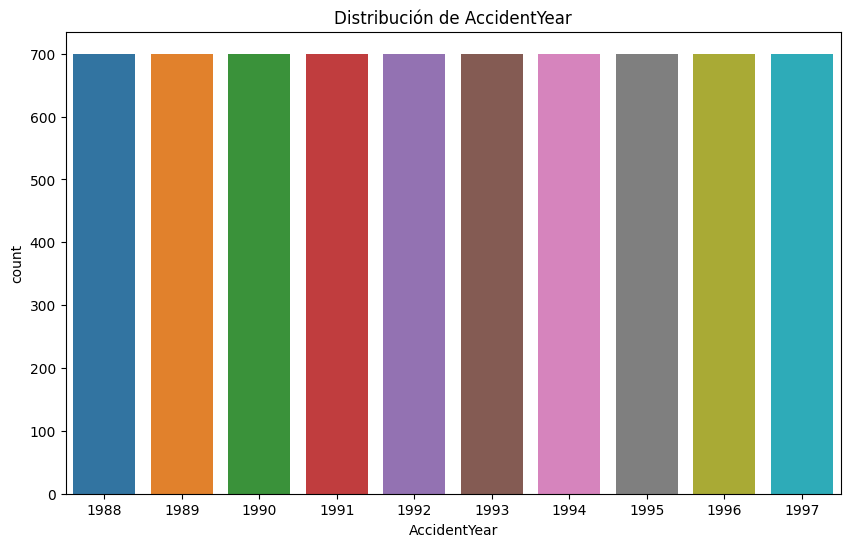

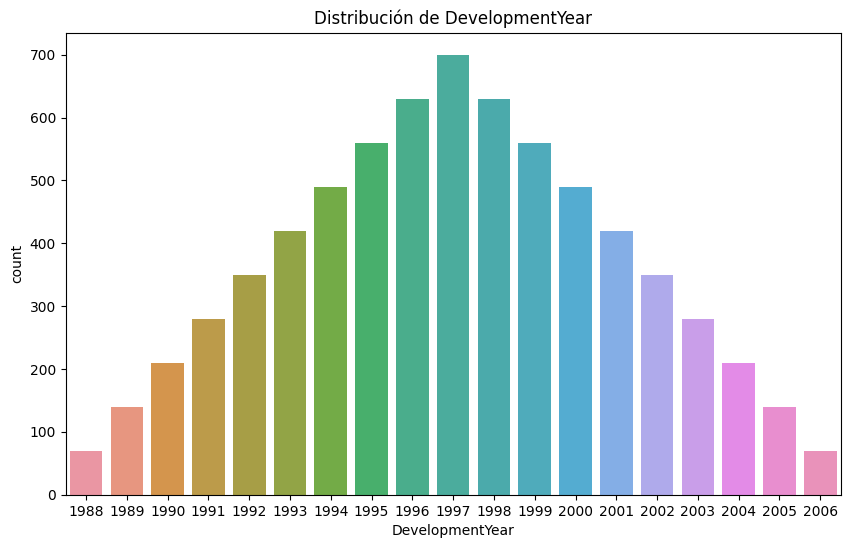

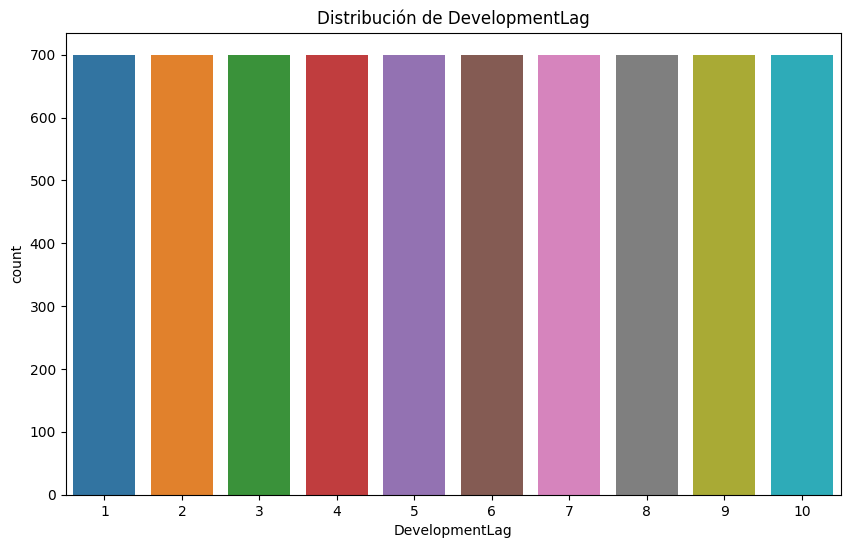

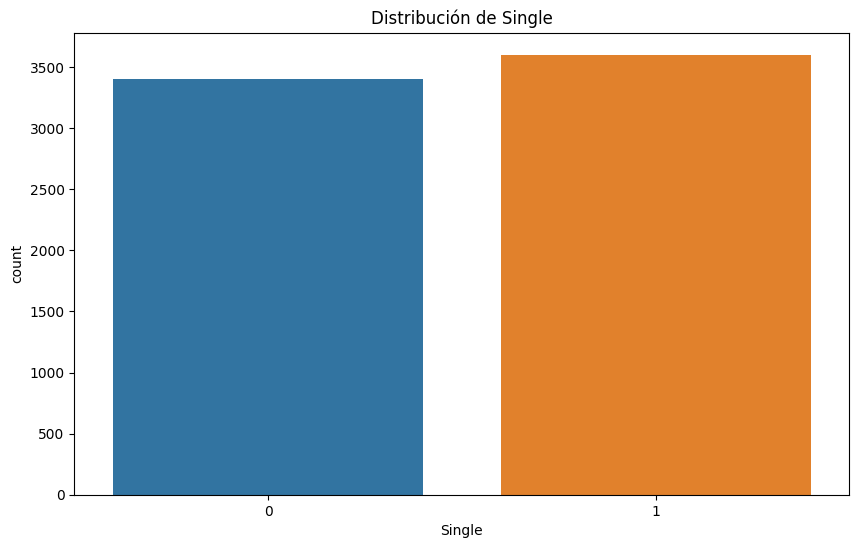

In [7]:
# Resumen de columnas categoricas
cat_cols = ['AccidentYear', 'DevelopmentYear', 'DevelopmentLag', 'Single']
# for col in cat_cols:
#   print("\nColumna:", col)
#   print(df[col].value_counts())

for col in cat_cols:
  plt.figure(figsize = (10,6))
  sns.countplot(data= df, x  = col)
  plt.title(f'Distribución de {col}')
  plt.show

## 2. EDA (Exploratory Data Analysis)

### 2.1 Análisis por año del accidente

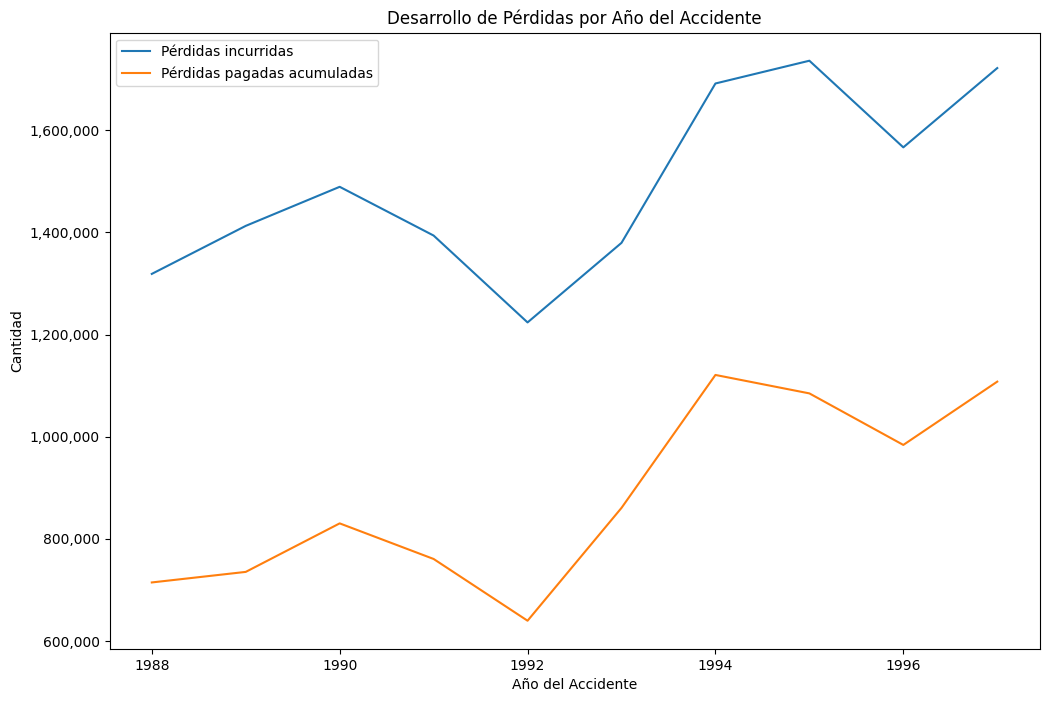

In [8]:
grouped_year_data = df.groupby('AccidentYear')[['IncurLoss_R1', 'CumPaidLoss_R1']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=grouped_year_data, x='AccidentYear', y='IncurLoss_R1', label='Pérdidas incurridas')
sns.lineplot(data=grouped_year_data, x='AccidentYear', y='CumPaidLoss_R1', label='Pérdidas pagadas acumuladas')
ax.set_title('Desarrollo de Pérdidas por Año del Accidente')
ax.set_xlabel('Año del Accidente')
ax.set_ylabel('Cantidad')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend()
plt.show()

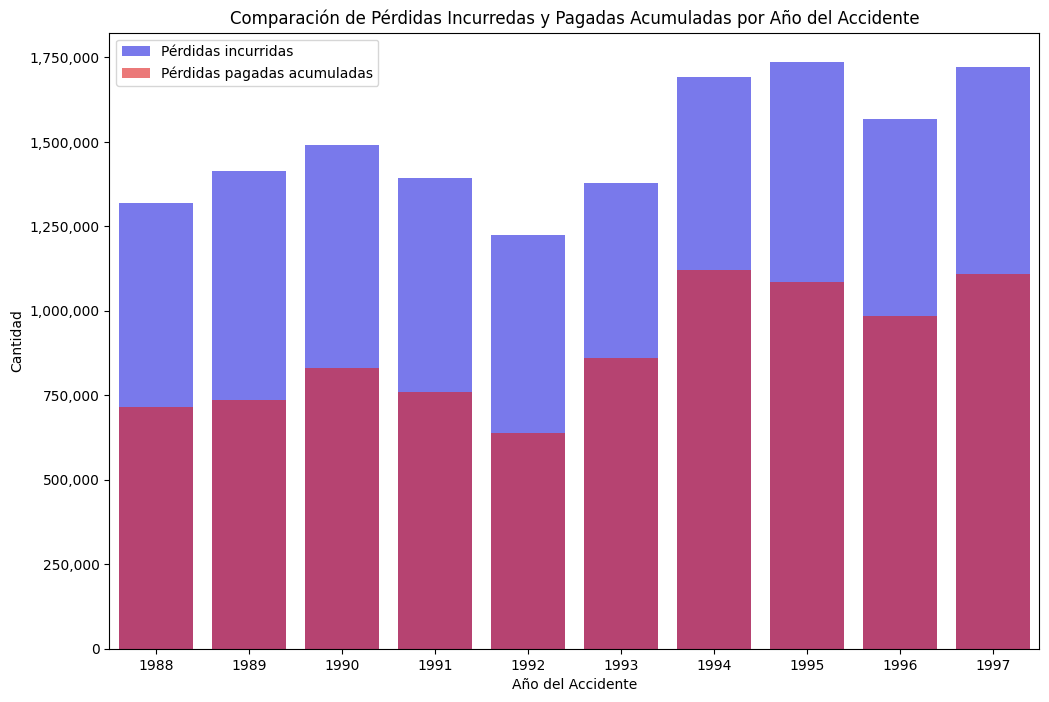

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=grouped_year_data, x='AccidentYear', y='IncurLoss_R1', color='b', alpha=0.6, label='Pérdidas incurridas')
sns.barplot(data=grouped_year_data, x='AccidentYear', y='CumPaidLoss_R1', color='r', alpha=0.6, label='Pérdidas pagadas acumuladas')
ax.set_title('Comparación de Pérdidas Incurredas y Pagadas Acumuladas por Año del Accidente')
ax.set_xlabel('Año del Accidente')
ax.set_ylabel('Cantidad')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend()
plt.show()

### 2.2 Análisis por compañia

Se identifica el top N de compañia organizadas por el incurrido, se realiza la comparativa entre el incurrido acumulado y el monto pagado acumulado.

In [10]:
singles = ['Todos'] + list(df.Single.unique())
topN = [5,10,15,20,30]

@interact
def plot_incur_company_single(Single = singles, N = topN):
  grouped_company_data = df.groupby(['GRNAME','Single'])[['IncurLoss_R1','CumPaidLoss_R1']].sum().reset_index()
  grouped_company_data = grouped_company_data.sort_values('IncurLoss_R1', ascending=False)

  if Single != 'Todos':
    grouped_company_data = grouped_company_data[grouped_company_data.Single == Single]

  grouped_company_data_N = grouped_company_data.nlargest(N, 'IncurLoss_R1')

  fig, ax = plt.subplots(figsize = (15,6))
  sns.barplot(x='IncurLoss_R1', y='GRNAME', data=grouped_company_data_N, orient='h', color='b', alpha=0.6)
  sns.barplot(x='CumPaidLoss_R1', y='GRNAME', data=grouped_company_data_N, orient='h', color='r', alpha=0.6)
  ax.set_title('Comparación de Reservas Incurredas por Grupo Asegurador')
  ax.set_xlabel('Reservas Incurridas')
  ax.set_ylabel('Nombre compañia')
  ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
  plt.show()

interactive(children=(Dropdown(description='Single', options=('Todos', '0', '1'), value='Todos'), Dropdown(des…

Adicionalmente se revisan el monto de las reservas por cada año de accidente.

In [11]:
companias = ['Todos'] + list(df.GRNAME.unique())
@interact
def plot_incur_company_year(compania=companias):

  g_data = df.groupby(['GRNAME','AccidentYear'])[['IncurLoss_R1']].sum().reset_index()

  if compania != 'Todos':
    g_filter_data = g_data[g_data.GRNAME == compania]
    data_to_plot = g_filter_data
  else:
    data_to_plot = g_data

  fig, ax = plt.subplots(figsize=(15,6))
  barplot = sns.barplot(x='AccidentYear', y='IncurLoss_R1', data=data_to_plot, errorbar=None)

  for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center',
                     va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

  ax.set_title('Comparación de Reservas Incurredas por Grupo Asegurador')
  ax.set_xlabel('Año del accidente')
  ax.set_ylabel('Incurrido')
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
  plt.show()

interactive(children=(Dropdown(description='compania', options=('Todos', 'Federated Mut Grp', 'Allstate Ins Co…

### 2.3 Desfase de desarrllo

In [12]:
companias = ['Todos'] + list(df.GRNAME.unique())
anios = [0] + list(df.AccidentYear.unique())

@interact
def plot_incur_lag(compania = companias, anio_accidente = anios):

  g_data = df.groupby(['GRNAME','AccidentYear','DevelopmentLag'])['IncurLoss_R1'].sum().reset_index()

  if compania != 'Todos':
    g_data = g_data[g_data.GRNAME == compania]
  if anio_accidente != 0:
    g_data = g_data[g_data.AccidentYear == anio_accidente]

  fig, ax = plt.subplots(figsize = (15,6))
  barplot = sns.barplot(data=g_data, x='DevelopmentLag', y='IncurLoss_R1', errorbar = None)

  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), ',.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points')

  ax.set_xlabel('Desfase de Desarrollo (DevelopmentLag)')
  ax.set_ylabel('Pérdidas incurridas (IncurLoss_R1)')
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
  ax.set_title('Pérdidas incurridas (IncurLoss_R1) por Desfase de Desarrollo')

  plt.show()

interactive(children=(Dropdown(description='compania', options=('Todos', 'Federated Mut Grp', 'Allstate Ins Co…

## 3. Aproximación al triangulo de desarrllo

In [13]:
# Validación
#df[(df.AccidentYear == 1988) & (df.DevelopmentLag == 1)]['IncurLoss_R1'].sum()

In [14]:
development_triangle = pd.pivot_table(df,
                                      values='IncurLoss_R1',
                                      index='AccidentYear',
                                      columns='DevelopmentYear', #DevelopmentLag
                                      aggfunc=np.sum)

development_triangle.fillna(0, inplace=True)
development_triangle

DevelopmentYear,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
AccidentYear,,,,,,,,,,,,,,,,,,,
1988,152977.0,134765.0,142678.0,132822.0,127537.0,130700.0,124585.0,124234.0,125157.0,123424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,156329.0,147046.0,164934.0,151579.0,143446.0,135096.0,131342.0,129196.0,129623.0,124336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,153967.0,163464.0,157356.0,155191.0,144908.0,139400.0,144752.0,143904.0,139821.0,146666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,161047.0,155210.0,154054.0,138139.0,130849.0,126986.0,128977.0,133818.0,132789.0,132101.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.0,150926.0,150118.0,140933.0,128428.0,112521.0,104923.0,103631.0,103756.0,122548.0,106058.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,151363.0,138155.0,140392.0,137466.0,136748.0,137029.0,127915.0,130570.0,135247.0,144790.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,162162.0,164685.0,151126.0,166509.0,182685.0,173018.0,165471.0,173014.0,175598.0,177498.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186276.0,170009.0,165786.0,171196.0,164834.0,164255.0,176005.0,173604.0,181154.0,183228.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165772.0,160219.0,165564.0,149057.0,148751.0,152526.0,154238.0,156323.0,157149.0,157095.0,0.0


In [15]:
g_data_triang = df.groupby(['AccidentYear', 'DevelopmentYear'])['IncurLoss_R1'].sum().reset_index()

triangulo_acumulado = pd.DataFrame()


for year in g_data_triang['AccidentYear'].unique():
    temp_df = g_data_triang[g_data_triang['AccidentYear'] == year].copy()
    temp_df['IncurLoss_R1_Acumulado'] = temp_df['IncurLoss_R1'].cumsum()
    triangulo_acumulado = pd.concat([triangulo_acumulado, temp_df], ignore_index=True)

triangulo_acumulado = triangulo_acumulado.pivot(index='AccidentYear', columns='DevelopmentYear', values='IncurLoss_R1_Acumulado')

triangulo_acumulado.fillna(0, inplace = True)
triangulo_acumulado

DevelopmentYear,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
AccidentYear,,,,,,,,,,,,,,,,,,,
1988,152977.0,287742.0,430420.0,563242.0,690779.0,821479.0,946064.0,1070298.0,1195455.0,1318879.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,156329.0,303375.0,468309.0,619888.0,763334.0,898430.0,1029772.0,1158968.0,1288591.0,1412927.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,153967.0,317431.0,474787.0,629978.0,774886.0,914286.0,1059038.0,1202942.0,1342763.0,1489429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,161047.0,316257.0,470311.0,608450.0,739299.0,866285.0,995262.0,1129080.0,1261869.0,1393970.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.0,150926.0,301044.0,441977.0,570405.0,682926.0,787849.0,891480.0,995236.0,1117784.0,1223842.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,151363.0,289518.0,429910.0,567376.0,704124.0,841153.0,969068.0,1099638.0,1234885.0,1379675.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,162162.0,326847.0,477973.0,644482.0,827167.0,1000185.0,1165656.0,1338670.0,1514268.0,1691766.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186276.0,356285.0,522071.0,693267.0,858101.0,1022356.0,1198361.0,1371965.0,1553119.0,1736347.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165772.0,325991.0,491555.0,640612.0,789363.0,941889.0,1096127.0,1252450.0,1409599.0,1566694.0,0.0
